In [119]:
import pandas as pd
import numpy as np

In [121]:
data = pd.read_excel('output.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change())

C:\Users\User\AppData\Local\Temp\ipykernel_2240\1152177014.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change())


In [123]:
#data.to_excel('outputReturns.xlsx', index=False)

In [125]:
data = pd.read_excel('outputReturns.xlsx')
eff = np.array([data.iloc[:, i].sum() / len(data) for i in range(len(data.columns))])

In [127]:
data -= eff[i]
data = data ** 2
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))])

In [129]:
print(eff)
print(risk)
data_er = pd.DataFrame({'company': data.columns, 'effiency': eff,'risk': risk})
#data_er.to_excel('outputEffRisk.xlsx', index=False)

[-9.05503221e-05 -5.40749307e-04  3.41529484e-04 -3.15035322e-04
  3.05320512e-04 -5.31287994e-04 -5.72416488e-04 -6.89974035e-04
  1.50129638e-03 -1.21900160e-04  6.19111526e-05 -1.31751090e-03
  2.93791043e-05  1.87742727e-03 -7.73372466e-04 -5.51113765e-04
  1.70665739e-04 -1.27774553e-03 -2.62307507e-04 -9.06000413e-04
  7.26390232e-05 -1.65395092e-04 -2.42258296e-04 -1.42522053e-03
 -1.02251052e-03 -9.21861193e-04 -1.71755604e-04  1.43817138e-04
 -1.64816370e-04 -9.88373125e-04 -5.47983354e-04  2.82699041e-04
  3.99407323e-04  1.08420511e-04 -7.81302213e-04 -4.55852921e-05
  2.12909918e-04 -6.69153561e-04 -2.81993013e-04  1.83227579e-03
 -5.06815808e-04 -1.01701129e-03 -5.89646291e-04 -1.72041775e-04
  1.18471118e-03 -2.24997825e-03 -1.51464024e-03 -5.05728893e-04
 -5.39615989e-04 -1.28688216e-03 -3.47057455e-04  2.32890505e-04
 -4.44720623e-04 -1.63946199e-04 -4.99406552e-04 -5.62433000e-04
 -3.79856245e-04  9.02195405e-04  6.14508912e-04 -2.04192802e-03
 -2.20463670e-04 -1.55493

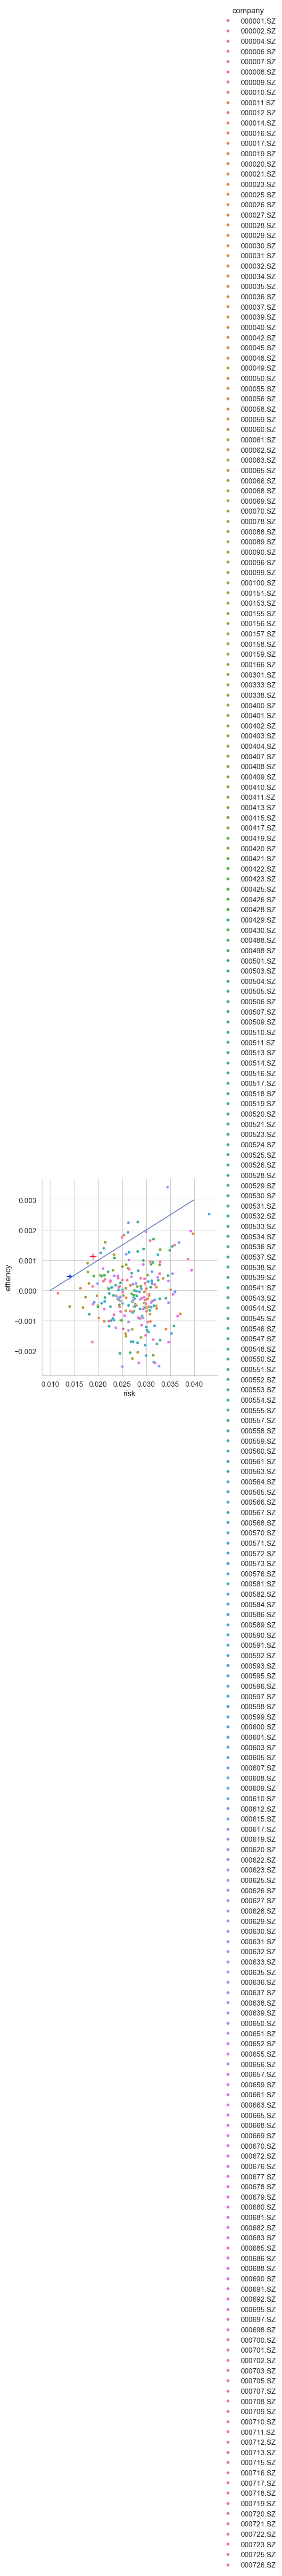

In [161]:
import seaborn as sns

sns.set_theme('paper', font_scale=1.25)

data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
sns.set_style("whitegrid")
sns.color_palette("bright")
import matplotlib.pyplot as plt
sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", hue="company", s=20
)
plt.plot([0.018912857535856], [0.00113183687257917], marker='+', color='red', markerfacecolor='red', markersize=10)
plt.plot([0.0141615553645026], [0.000471766134990687], marker='+', color='blue', markerfacecolor='blue', markersize=10)
plt.plot(np.linspace(0.01, 0.04, num=1000), np.linspace(0, 0.003, num=1000))
#plt.plot([0.025366149, 0.017833597, 0.021487727, 0.02826465, 0.014161555, 0.021200413, 0.020548387, 0.026248667, 0.02632262, 0.034473074, 0.018912858, 0.024987783],
       # [0.001832276, 0.000902195, 0.001594078, 0.002265553, 0.000471766, 0.001396771, 0.001242519, 0.001923504, 0.002242825, 0.00341725, 0.001131837, 0.001754088])

data_pareto_optimal = data_eff_risk[data_eff_risk['effiency'] > 0.1 * data_eff_risk['risk'] - 0.001]
#data_pareto_optimal.to_excel('outputParetoOptimal.xlsx', index=False)

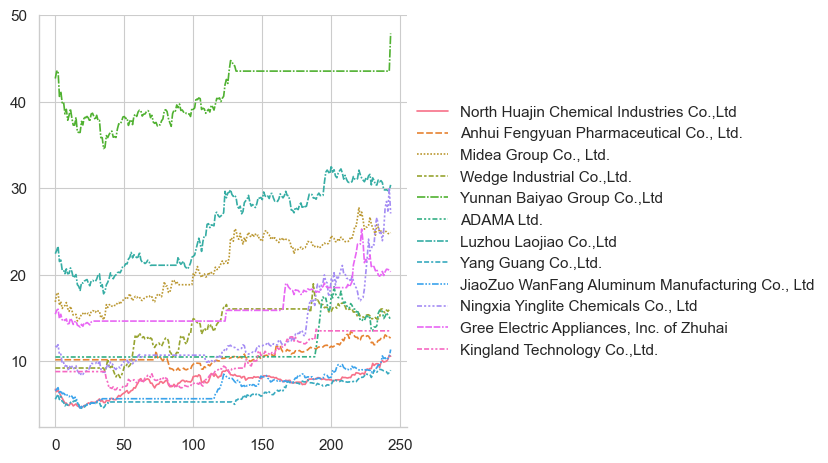

In [67]:
data = pd.read_excel('output.xlsx', usecols=["000059.SZ", "000153.SZ", "000333.SZ", "000534.SZ", "000538.SZ", "000553.SZ", "000568.SZ", "000608.SZ", "000612.SZ", "000635.SZ", "000651.SZ", "000711.SZ"])
data = data.rename(columns={'000059.SZ': 'North Huajin Chemical Industries Co.,Ltd', '000153.SZ': 'Anhui Fengyuan Pharmaceutical Co., Ltd.', '000333.SZ': 'Midea Group Co., Ltd.', '000534.SZ': 'Wedge Industrial Co.,Ltd.', '000538.SZ': 'Yunnan Baiyao Group Co.,Ltd', '000553.SZ': 'ADAMA Ltd.', '000568.SZ': 'Luzhou Laojiao Co.,Ltd', '000608.SZ': 'Yang Guang Co.,Ltd.', '000612.SZ': 'JiaoZuo WanFang Aluminum Manufacturing Co., Ltd', '000635.SZ': 'Ningxia Yinglite Chemicals Co., Ltd', '000651.SZ': 'Gree Electric Appliances, Inc. of Zhuhai ', '000711.SZ': 'Kingland Technology Co.,Ltd.'})
sns.set_theme('paper', font_scale=1.25)
sns.set_style("whitegrid")
g = sns.relplot(
    data=data, kind="line",
)

In [69]:
data_VaR = pd.read_excel('outputReturns.xlsx', usecols=["000059.SZ", "000153.SZ", "000333.SZ", "000534.SZ", "000538.SZ", "000553.SZ", "000568.SZ", "000608.SZ", "000612.SZ", "000635.SZ", "000651.SZ", "000711.SZ"])
data_VaR.to_excel('outputReturnsVaR.xlsx', index=False)

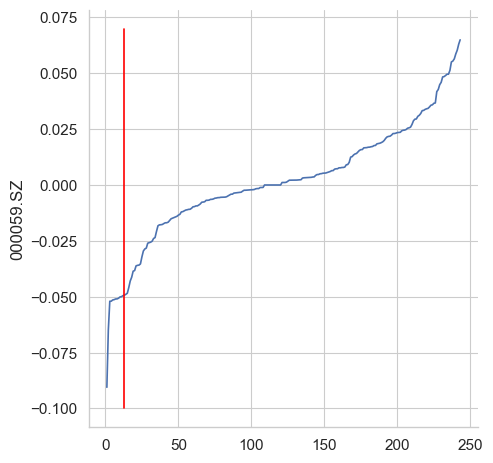

In [111]:
data_VaR = pd.read_excel('outputReturnsVaR.xlsx')
sns.relplot(data=data_VaR, kind="line", x=np.arange(244), y="000059.SZ")
plt.plot([13, 13], [-0.1, 0.07], color="red")

In [113]:
new_data_VaR = pd.DataFrame({'company': data_VaR.columns, 'VaR': data_VaR.iloc [13]})
new_data_VaR.to_excel('outputReturnsVaRResult.xlsx', index=False)

In [159]:
data_СVaR = pd.DataFrame({'company': data_VaR.columns, 'СVaR': data_VaR.iloc[1:14].mean()})
data_СVaR.to_excel('outputReturnsCVaRResult.xlsx', index=False)